    NRUN  IEVT     ECM       E1       P1     PT1     PX1     PY1      PZ1  \
0  20631   746  91.250   41.847   41.847  41.725 -40.788   8.793    3.192   
1  20694  1956  91.286  110.783  110.783  42.253  35.688 -22.621 -102.408   
2  20704   767  91.280   28.322   28.322  28.305   7.921 -27.174    0.977   
3  20723  1571  91.282   42.509   42.508  42.505  32.779  27.059    0.552   
4  21112   148  91.282   39.894   39.894  39.845  -7.051 -39.216   -1.980   

    Q1  ...      P2     PT2     PX2     PY2     PZ2   Q2   PHI2  THETA2  \
0 -1.0  ...  33.876  46.693  33.017  -7.097  -2.666  1.0 -0.212   1.650   
1  1.0  ...  62.660  24.881  17.593 -10.661 -59.187 -1.0 -0.545   2.807   
2 -1.0  ...  22.503   9.863  -6.974  21.395  -0.104  1.0  1.886   1.575   
3 -1.0  ...  40.701  44.330 -31.346 -25.960  -0.312  1.0 -2.450   1.578   
4  1.0  ...  36.151   8.602   6.083  35.568  -2.199 -1.0  1.401   1.632   

   MISSPT  MISSPHI  
0   7.954   -0.215  
1  62.821    2.583  
2   5.857    1.733  
3 

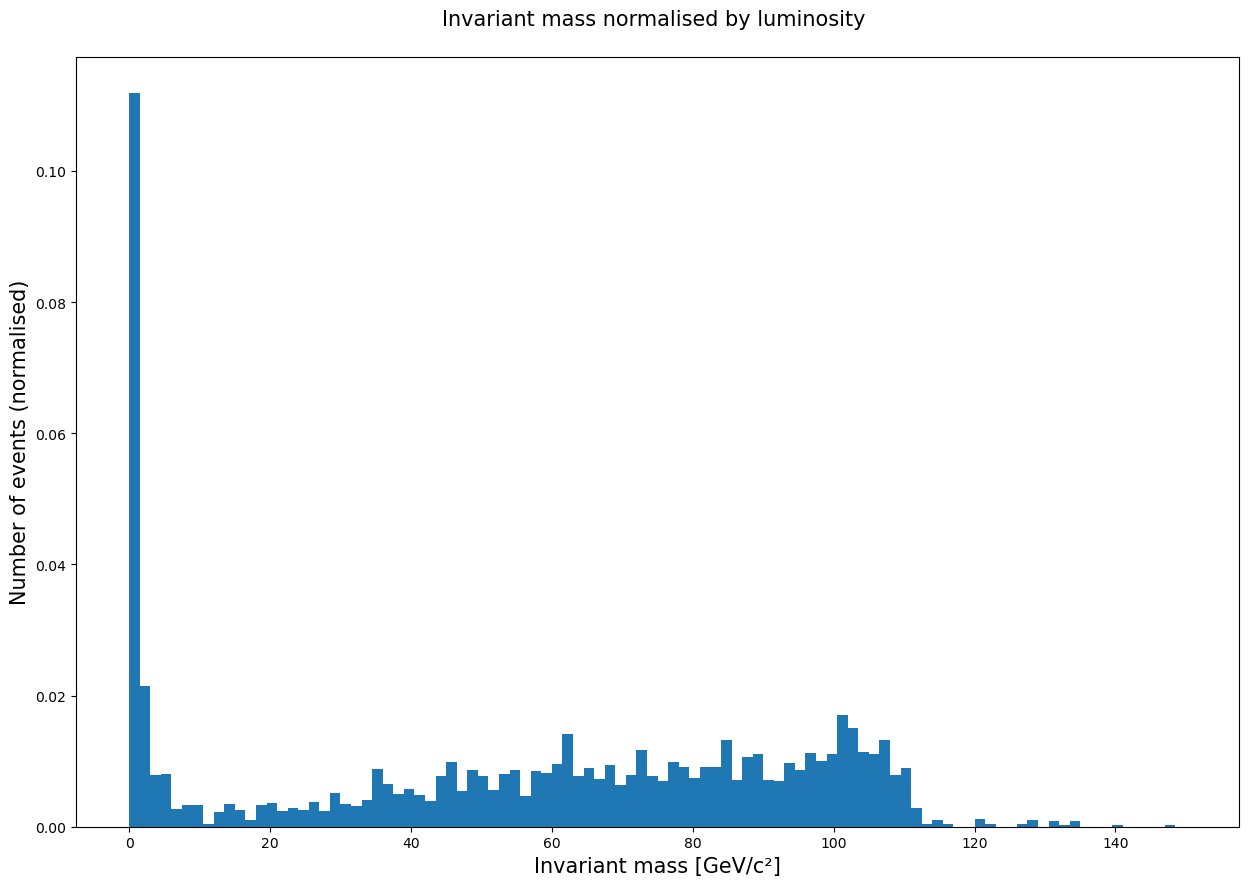

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

dataset91 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short91_f1_000.csv.gz',index_col=False)
dataset92 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short92_e2_000.csv.gz',index_col=False)
dataset93 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short93_d2_000.csv.gz',index_col=False)
dataset94 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short94_c2_000.csv.gz',index_col=False)

print(dataset91.head())
#since invariant mass isn't calculated let's do it here:
dataset91["ETA1"] = - np.log(np.tan(dataset91.THETA1/2))
dataset91["ETA2"] = - np.log(np.tan(dataset91.THETA2/2))
dataset91["M"] = np.sqrt(2*dataset91.PT1*dataset91.PT2*(np.cosh(dataset91.ETA1 - dataset91.ETA2) - np.cos(dataset91.PHI1 - dataset91.PHI2)))

#values sorted by ECM (for convenience of programming)
dataset91 = dataset91.sort_values(['ECM']) 
dataset91 = dataset91.reset_index(drop = True) #corrects index after sort


#finds all unique ECM, used for finding close values affected by noise
#print(np.sort(dataset91.ECM.unique())) 
#based off these separate the dataset into sections with different luminosities


#section 1: 
slice_index1 = dataset91[dataset91.ECM == 89.506].index[0] 
lum1 = 711.1 #luminosity for this section
dataset91.loc[0:slice_index1-1, "LUM"] = lum1

#section 2: 
slice_index2 = dataset91[dataset91.ECM == 90.256].index[0] 
lum2 = 632.7 #luminosity for this section
dataset91.loc[slice_index1:slice_index2-1, "LUM"] = lum2

#section 3: 
slice_index3 = dataset91[dataset91.ECM == 91.25].index[0] 
lum3 = 622.6 #luminosity for this section
dataset91.loc[slice_index2:slice_index3-1, "LUM"] = lum3

#section 4: 
slice_index4 = dataset91[dataset91.ECM == 92.004].index[0] 
lum4 = 2482.5 #luminosity for this section
dataset91.loc[slice_index3:slice_index4-1, "LUM"] = lum4

#section 5: 
slice_index5 = dataset91[dataset91.ECM == 93.015].index[0] 
lum5 = 666.1 #luminosity for this section
dataset91.loc[slice_index4:slice_index5-1, "LUM"] = lum5

#section 6: 
slice_index6 = dataset91[dataset91.ECM == 93.765].index[0] 
lum6 = 634.6 #luminosity for this section
dataset91.loc[slice_index5:slice_index6-1, "LUM"] = lum6

#section 7: 
lum7 = 681.2 #luminosity for this section
dataset91.loc[slice_index6:, "LUM"] = lum7


#weighted by luminosity
fig = plt.figure(figsize=(15, 10))
plt.hist(dataset91.M, bins=100, range=(0,150), weights = 1/dataset91.LUM, density = True)



plt.xlabel('Invariant mass [GeV/c²]', fontsize=15)
plt.ylabel('Number of events (normalised)', fontsize=15)
plt.title('Invariant mass normalised by luminosity \n', fontsize=15) 

plt.show()

Important note: Making copies of each section, changing them and then creating a new
dataset from the copies is incredibly inefficient, but much clearer in my opinion. Since we 
are making something that could be used for education, I'm going to write this method in this 
comment for now. It's far easier to understand than the niche features of pandas. The 
result is exactly the same.

#section 1: 

slice_index1 = dataset91[dataset91.ECM == 89.506].index[0] 

section1 = dataset91[0:slice_index1]

lum_lst88 = 711.1 #luminosity for this section

section1["Normalised"] = np.divide(section1.M, lum_lst88) 

print(section1.head(20))

#at the end combine sections:

dataset91 = [section1, section2, section3,...]


The values and the uncertainties from the optimization:

The value of the decay width = 3.1361466896510706 +- 2.3230359758629424
The value of the maximum of the distribution = 101.92617927953923 +- 0.6844987911163268
a = 0.00018297328102475017 +- 0.00011771493002526629
b = 0.004378319891339153 +- 0.009797185173143886
A = 0.08417719847804021 +- 0.05503739856412235


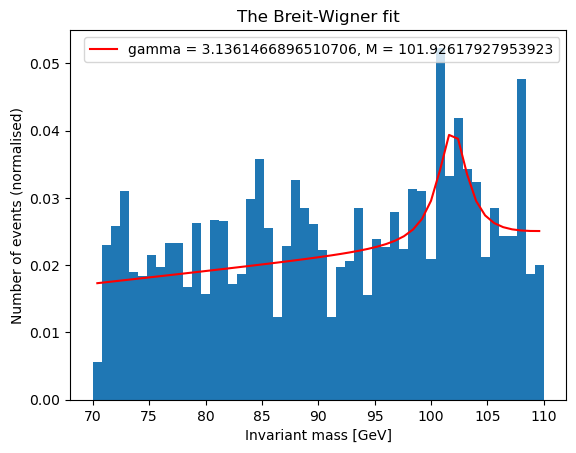

In [5]:
#limit to where Z-boson should be:
lowerlimit = 70
upperlimit = 110
bins = 50

#Histogram of that area
limitedmasses = dataset91[(dataset91.M > lowerlimit) & (dataset91.M < upperlimit)]
histogram = plt.hist(limitedmasses.M, bins=bins, range=(lowerlimit,upperlimit), weights = 1/limitedmasses.LUM, density = True)


def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

#Initial guesses:
initials = [3, 100, 4, 2, 100]

#use the histogram to make a function:
y = histogram[0]
x = 0.5*(histogram[1][0:-1] + histogram[1][1:])
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
#Values from optimization:
print("The values and the uncertainties from the optimization:")
print("")
print("The value of the decay width = {} +- {}".format(best[0], error[0]))
print("The value of the maximum of the distribution = {} +- {}".format(best[1], error[1]))
print("a = {} +- {}".format(best[2], error[2]))
print("b = {} +- {}".format(best[3], error[3]))
print("A = {} +- {}".format(best[4], error[4]))


#plot graph:
plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events (normalised)')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

This is too inaccurate to get results. Let's remove big pseudorapidities and try again:

732
332
The values and the uncertainties from the optimization:

The value of the decay width = 1.6852899017026737 +- 0.99350849203215
The value of the maximum of the distribution = 102.11766265889729 +- 0.2765691653232274
a = 0.00011629965637023451 +- 8.014212394554169e-05
b = 0.011791560489557188 +- 0.006909100518215951
A = 0.06249931440752245 +- 0.02609400412978618


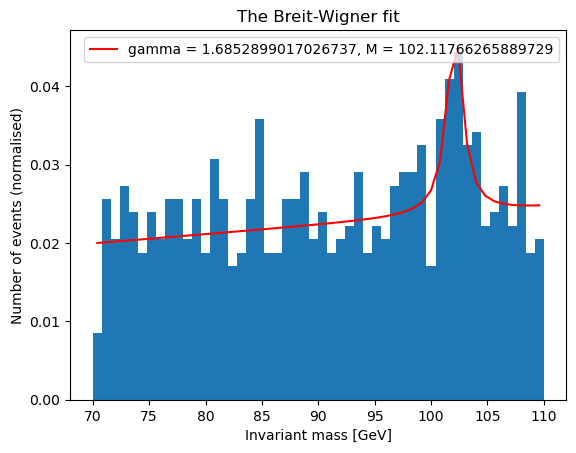

In [6]:
pseudorapidity_limit = 0.5
print(len(limitedmasses))
limited_pseudorapidies = limitedmasses[(abs(limitedmasses.ETA1) < 0.05) & (abs(limitedmasses.ETA2) < 0.05)]
print(len(limited_pseudorapidies))
histogram = plt.hist(limitedmasses.M, bins=bins, range=(lowerlimit,upperlimit), density = True)


def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

#Initial guesses:
initials = [1.5, 100, 0, 2, 100]

#use the histogram to make a function:
y = histogram[0]
x = 0.5*(histogram[1][0:-1] + histogram[1][1:])
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
#Values from optimization:
print("The values and the uncertainties from the optimization:")
print("")
print("The value of the decay width = {} +- {}".format(best[0], error[0]))
print("The value of the maximum of the distribution = {} +- {}".format(best[1], error[1]))
print("a = {} +- {}".format(best[2], error[2]))
print("b = {} +- {}".format(best[3], error[3]))
print("A = {} +- {}".format(best[4], error[4]))


#plot graph:
plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events (normalised)')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()